In [1]:
pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


#Setup

In [2]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras_preprocessing.image import ImageDataGenerator
import albumentations as A
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
training_dir = '/content/drive/MyDrive/Dataset Dr.Fruithy/Apple'

#Data Augmentation

In [5]:
training_datagen = ImageDataGenerator(
    rescale=1/255., zoom_range=0.2, shear_range=0.2,
    rotation_range=20, horizontal_flip=True, validation_split=0.2
)
train_generator = training_datagen.flow_from_directory(
    training_dir, target_size=(150,150), color_mode='rgb', class_mode='categorical', subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    training_dir, target_size=(150,150), color_mode='rgb', class_mode='categorical', subset='validation'
)

Found 4685 images belonging to 10 classes.
Found 1166 images belonging to 10 classes.


#Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Training

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, steps_per_epoch=80, validation_data=validation_generator,
          validation_steps=20, epochs=50)

Epoch 1/50
80/80 [==============================] - 2087s 26s/step - loss: 2.0028 - accuracy: 0.4098 - val_loss: 1.6388 - val_accuracy: 0.4172
Epoch 2/50
80/80 [==============================] - 859s 11s/step - loss: 1.3958 - accuracy: 0.5116 - val_loss: 1.6289 - val_accuracy: 0.4641
Epoch 3/50
80/80 [==============================] - 397s 5s/step - loss: 1.3364 - accuracy: 0.5325 - val_loss: 1.4484 - val_accuracy: 0.5016
Epoch 4/50
80/80 [==============================] - 196s 2s/step - loss: 1.2971 - accuracy: 0.5555 - val_loss: 1.5319 - val_accuracy: 0.4797
Epoch 5/50
80/80 [==============================] - 106s 1s/step - loss: 1.2112 - accuracy: 0.5880 - val_loss: 1.4904 - val_accuracy: 0.5078
Epoch 6/50
80/80 [==============================] - 68s 856ms/step - loss: 1.1786 - accuracy: 0.5707 - val_loss: 1.6188 - val_accuracy: 0.4203
Epoch 7/50
80/80 [==============================] - 49s 603ms/step - loss: 1.1351 - accuracy: 0.6047 - val_loss: 1.6723 - val_accuracy: 0.3953
Epoch 

#Plot

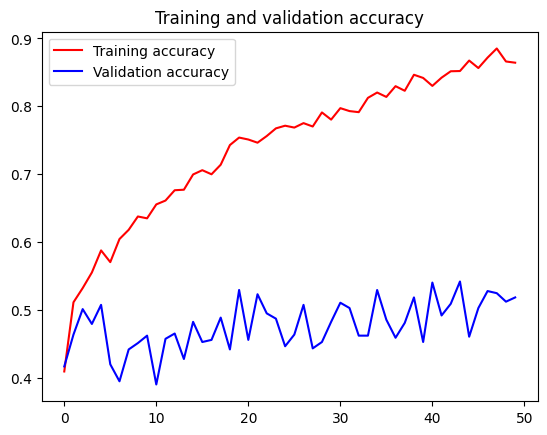

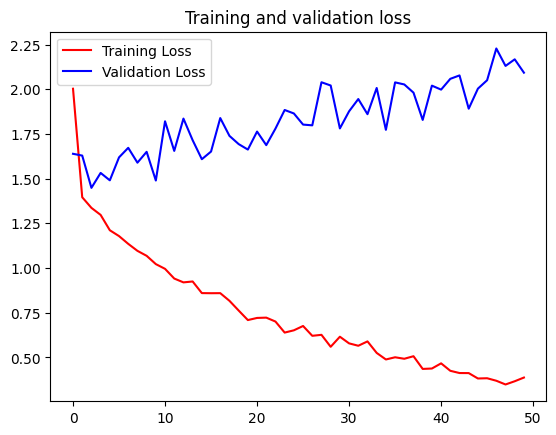

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#training dan validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Export